In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Data visualization

## Histogram

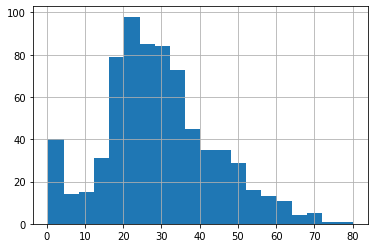

In [3]:
# Plot histogram on 'Age' and split the values in 20 bins
titanic['Age'].hist(bins=20)
plt.show()

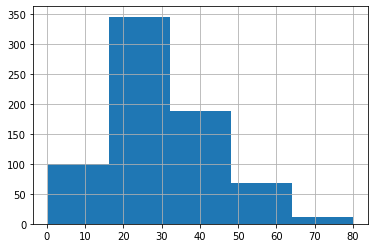

In [4]:
# Plot histogram on 'Age' and split the values in 5 bins
titanic['Age'].hist(bins=5)
plt.show()

## Bar plots

In [5]:
# Count number of female & male
gender_count = titanic.groupby('Sex')['Age'].count()
gender_count

Sex
female    261
male      453
Name: Age, dtype: int64

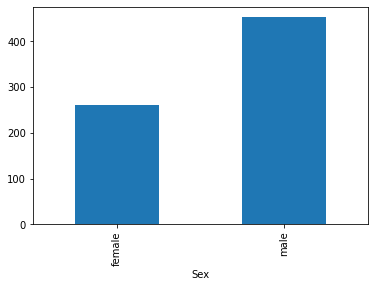

In [6]:
# Bar plot on 'gender_count'
gender_count.plot(kind='bar')
plt.show()

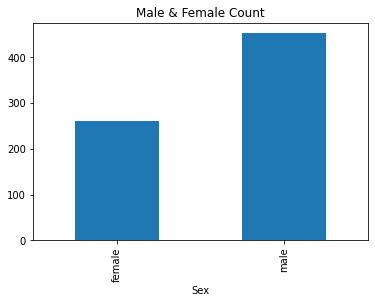

In [7]:
# Bar plot of male & female with title
gender_count.plot(kind='bar', title='Male & Female Count')
plt.show()

## Line plot

In [42]:
# Extract 10 ages from first 7 to 16 
ten_ages = titanic.Age.iloc[7:17]
ten_ages

7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
Name: Age, dtype: float64

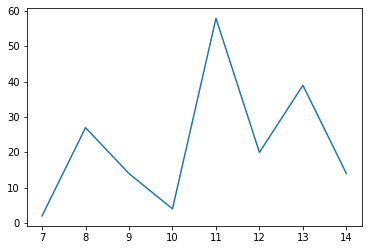

In [9]:
# Line plot of 'ten_ages', index is on x-axis and values are on y-axis
ten_ages.plot(x=ten_ages.index, y=ten_ages.values, kind='line')
plt.show()

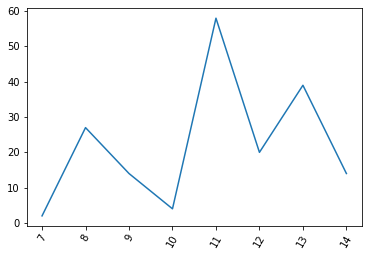

In [11]:
# Line plot with rotated index numbers on x-axis
ten_ages.plot(x=ten_ages.index, y=ten_ages.values, kind='line', rot=60)
plt.show()

## Scatter Plots

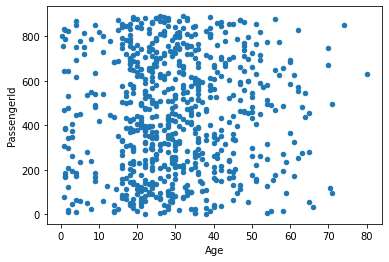

In [12]:
# Scatter plot, 'Age' on the x-axis and 'PassengerId' on y-axis
titanic.plot(x='Age', y='PassengerId', kind='scatter')
plt.show()

## Layers plot

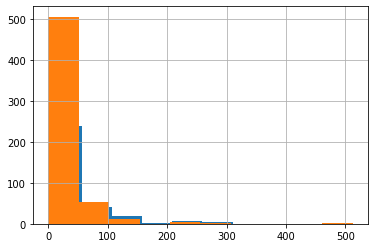

In [13]:
# Layers plot of female & male
titanic[titanic['Sex'] == 'female']['Fare'].hist()
titanic[titanic['Sex'] == 'male']['Fare'].hist()
plt.show()

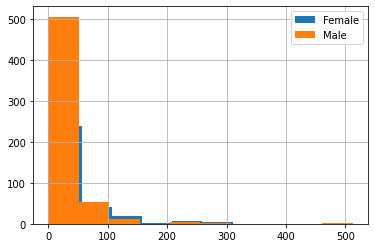

In [14]:
# Add legend to layer plot
titanic[ titanic['Sex'] ==  "female"]['Fare'].hist()
titanic[ titanic['Sex'] ==  "male"]['Fare'].hist()
plt.legend(['Female', 'Male'])
plt.show()

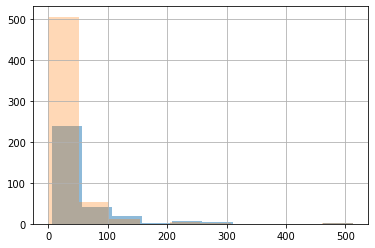

In [17]:
# Add transparency
titanic[titanic['Sex']=='female']['Fare'].hist(alpha=0.5)
titanic[titanic['Sex']=='male']['Fare'].hist(alpha=0.3)
plt.show()

## Working with missing values

In [18]:
titanic.shape

(891, 12)

In [19]:
# Find missing values
titanic.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [20]:
# Find if any column have missing values
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [21]:
# Count the number of missing values in each column
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

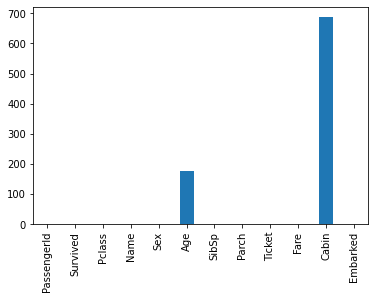

In [23]:
# Bar plot on missing values
titanic.isna().sum().plot(kind='bar')
plt.show()

In [24]:
# Removing missing values
titanic.dropna().head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [26]:
# Find number of rows after dropna()
titanic.dropna().shape

(183, 12)

In [32]:
# Fill the missing value with 0
titanic.fillna(0).shape

(891, 12)

## Creating DataFrame from dictionary of dictionaries

In [33]:
list_of_dictionary = [
    {'name': 'Ginger',
     'breed': 'lusi',
     'height_cm': 22,
     'weight_kgs':10 ,
     'date_of_birth': "2020-02-14"},
    
    { 'name': 'Scout',
     'breed': 'Dalmatian',
     'height_cm': 59,
     'weight_kgs': 35 ,
     'date_of_birth': "2019-05-09"}
]

list_of_dictionary

[{'name': 'Ginger',
  'breed': 'lusi',
  'height_cm': 22,
  'weight_kgs': 10,
  'date_of_birth': '2020-02-14'},
 {'name': 'Scout',
  'breed': 'Dalmatian',
  'height_cm': 59,
  'weight_kgs': 35,
  'date_of_birth': '2019-05-09'}]

In [34]:
# Convert dict into DataFrame
dogs = pd.DataFrame(list_of_dictionary)
dogs

,name,breed,height_cm,weight_kgs,date_of_birth
0,Ginger,lusi,22,10,2020-02-14
1,Scout,Dalmatian,59,35,2019-05-09


## Creating DataFrame from dictionary of lists

In [35]:
dict_of_list = {
    'name': ['lusi', 'Scout'],
    'breed': ['Desi', 'farmi'],
    'weight_kg': [22,20]
}

# DataFrame from dict of lists
dogs1 = pd.DataFrame(dict_of_list)
dogs1

,name,breed,weight_kg
0,lusi,Desi,22
1,Scout,farmi,20


## Reading & writing CSVs

In [36]:
dogs = pd.read_csv('./data/dogs.csv')
dogs

,Name,Breed,Color,Height(cm),Weight(kg),Date of Birth
0,Bella,Labrador,Brown,56,25,2013-07-01
1,Charlie,Poodle,Black,43,23,2016-09-16
2,Lucy,Chow,Brown,46,22,2014-08-25
3,Cooper,Schnauzer,Gray,49,17,2011-12-11
4,Max,Labrador,Black,59,29,2017-01-20
5,Stella,Chihuahua,Tan,18,2,2015-04-20
6,Bernie,St. Bernard,White,77,74,2018-02-2


In [38]:
# Create new column with all boolean values
dogs['new_column'] = True
dogs

,Name,Breed,Color,Height(cm),Weight(kg),Date of Birth,new_column
0,Bella,Labrador,Brown,56,25,2013-07-01,True
1,Charlie,Poodle,Black,43,23,2016-09-16,True
2,Lucy,Chow,Brown,46,22,2014-08-25,True
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,True
4,Max,Labrador,Black,59,29,2017-01-20,True
5,Stella,Chihuahua,Tan,18,2,2015-04-20,True
6,Bernie,St. Bernard,White,77,74,2018-02-2,True


In [39]:
# Save DataFrame into csv
dogs.to_csv('./new_dogs.csv')